# Dynamics of Entanglement

In [12]:
from qiskit.quantum_info import DensityMatrix, Statevector, SparsePauliOp, Operator, partial_trace, entropy, schmidt_decomposition

from spin import Nearest_Neighbour_1d
from trotter import expH
from plot_config import *

import numpy as np

fig_dir, data_dir = './figs', './data'

## Entanglement measures: Entanglement Entropy of Reduced Density Matrix (RDM) 

`Here is a simple example of the entanglement in Hamiltonian dynamics`

We take the 1D transverse-field Ising (TFI) Hamiltonian with n=8 qubits

The TFI Hamiltonian:  SparsePauliOp(['IIIIIIXX', 'IIIIIXXI', 'IIIIXXII', 'IIIXXIII', 'IIXXIIII', 'IXXIIIII', 'XXIIIIII', 'XIIIIIIX', 'IIIIIIIZ', 'IIIIIIZI', 'IIIIIZII', 'IIIIZIII', 'IIIZIIII', 'IIZIIIII', 'IZIIIIII', 'ZIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j])


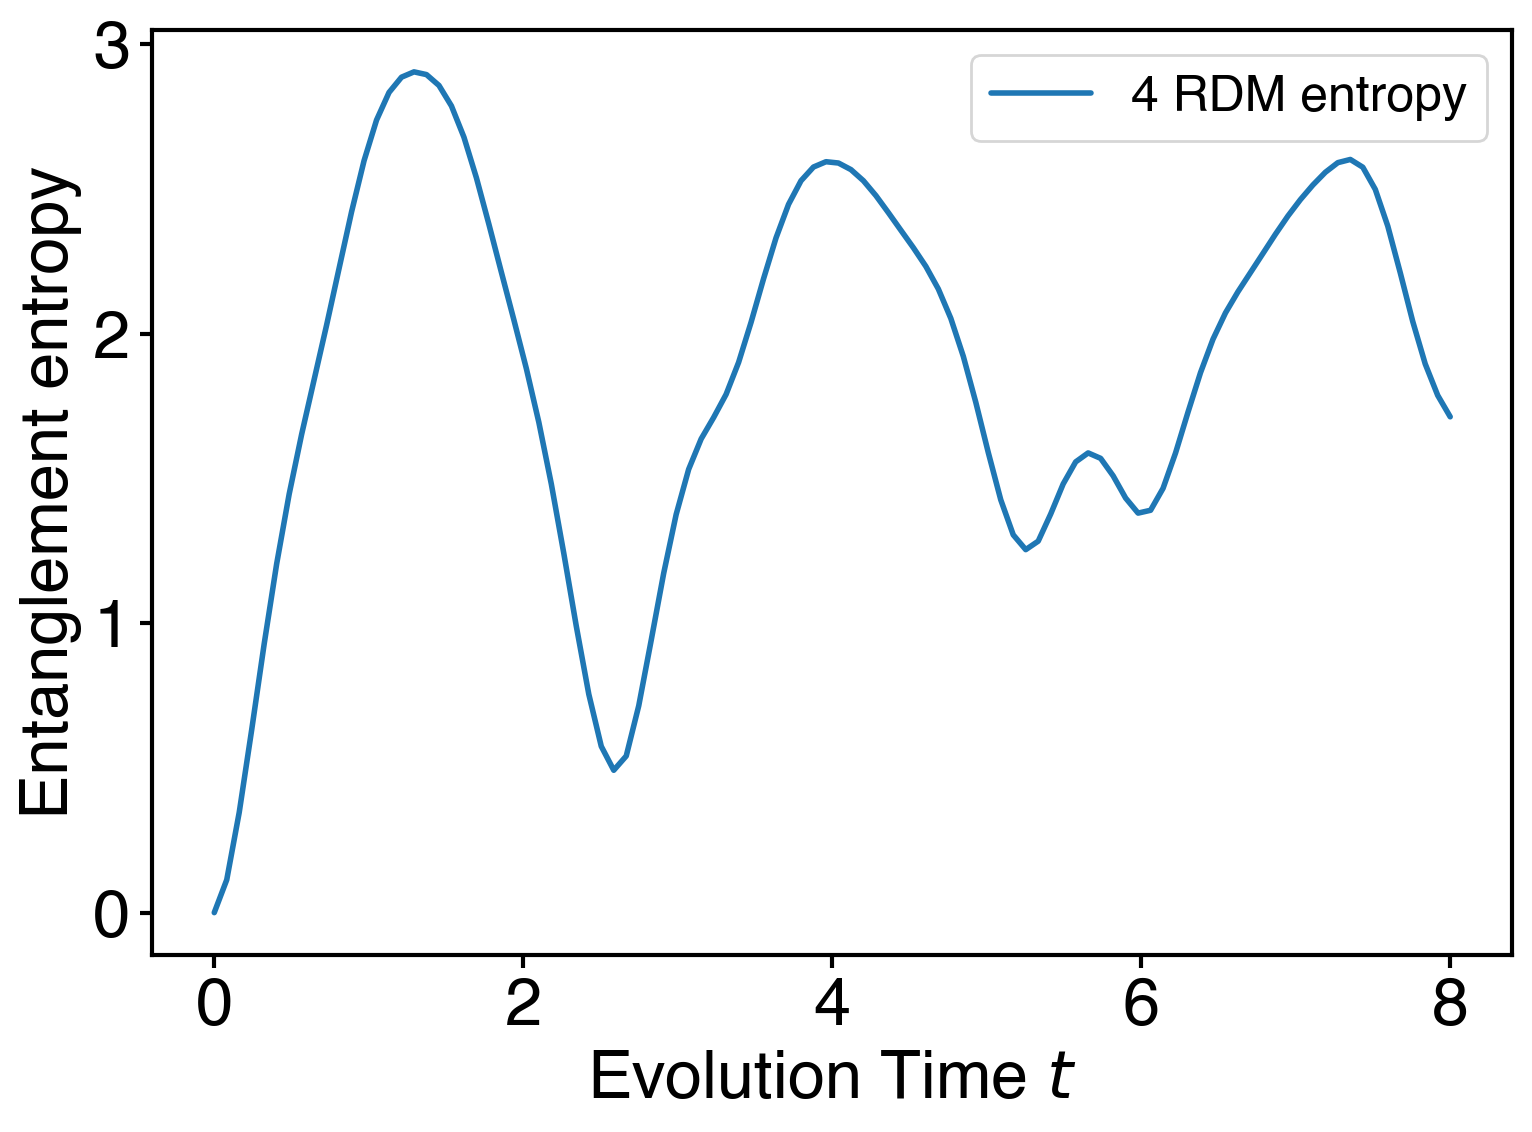

In [10]:
n = 8  # number of spins
tfi = Nearest_Neighbour_1d(n, Jx=1, hz=2, pbc=True)
print('The TFI Hamiltonian: ', tfi.ham)

# Initial state: |10...01>
init_state = Statevector.from_label('10'* (n//2)+'1'*(n%2))
# init_state = Statevector.from_label('0'* n)
#init_state_2 = Statevector.from_label('1'* i)
#init_state = (1/np.sqrt(2))*(init_state_1.data + init_state_2.data)

# time steps 
t_list = np.linspace(0, n, 100)
entropy_list, purity_list = [], []

sub_dim = n // 2  # dimension of the subsystem

# Calculate the entanglement measures 
for t in t_list:
    U_exact = expH(tfi.ham, t)
    finl_state = U_exact @ init_state.data
    #finl_state = U_exact @ init_state
    rdm = partial_trace(DensityMatrix(Statevector(finl_state)), list(range(0, sub_dim)))
    # purity_list.append(rdm.purity())
    entropy_list.append(entropy(rdm))
    
# Plotting the results
fig, ax = plt.subplots()
# ax.plot(t_list, purity_list, label=f'{sub_dim} RDM Purity')
ax.plot(t_list, entropy_list, label=f'{sub_dim} RDM entropy')
    
ax.set_xlabel(rf'Evolution Time $t$')
ax.set_ylabel('Entanglement entropy')
# ax.set_ylabel('Entanglement measures')
ax.legend()
fig.savefig(rf'{fig_dir}/tfi_entanglement_n={n}.pdf', bbox_inches='tight')

In [11]:
## generate the graph from the TFI Hamiltonian

## Explore the entanglement of quantum walk (todo)

In [8]:
## define the Hamiltonian (Laplacian) with a graph
## define the initial state
## evolve the state by exp(-i Ht)
## calculate the entanglement measures at each time step